In [1]:
from PIL import Image
from torchvision import transforms as tfs
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import torch
import timm 
torch.manual_seed(666)
%matplotlib inline

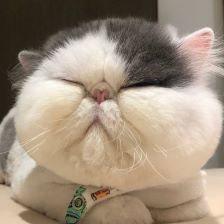

In [2]:
# 读入一张图片
im = Image.open('./cat.jpg')
im

## 随机比例放缩
随机比例缩放主要使用的是`torchvision.transforms.Resize()`这个函数，第一个参数可以是一个整数，那么图片会保存现在的宽和高的比例，并将更短的边缩放到这个整数的大小，第一个参数也可以是一个`tuple`，那么图片会直接把宽和高缩放到这个大小；第二个参数表示放缩图片使用的方法，比如最邻近法，或者双线性差值等，一般双线性差值能够保留图片更多的信息，所以 `pytorch`默认使用的是双线性插值

before scale, shape: (224, 224)
after scale, shape: (200, 100)


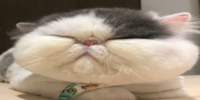

In [3]:
# 比例缩放
# https://pytorch.org/vision/main/generated/torchvision.transforms.Resize.html
print('before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((100, 200))(im)
print('after scale, shape: {}'.format(new_im.size))
new_im

## 随机位置截取
随机位置截取能够提取出图片中局部的信息，使得网络接受的输入具有多尺度的特征，所以能够有较好的效果。在`torchvision` 中主要有下面两种方式，一个是`torchvision.transforms.RandomCrop()`，传入的参数就是截取出的图片的长和宽，对图片在随机位置进行截取；第二个是`torchvision.transforms.CenterCrop()`，同样传入截取出的图片的大小作为参数，会在图片的中心进行截取

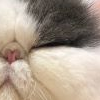

In [4]:
# 随机裁剪出 100 x 100 的区域
random_im1 = tfs.RandomCrop(100)(im)
random_im1

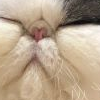

In [5]:
# 中心裁剪出 100 x 100 的区域
center_im = tfs.CenterCrop(100)(im)
center_im

## 随机的水平和竖直方向翻转
对于上面这一张猫的图片，如果我们将它翻转一下，它仍然是一张猫，但是图片就有了更多的多样性，所以随机翻转也是一种非常有效的手段。在`torchvision`中，随机翻转使用的是`torchvision.transforms.RandomHorizontalFlip()`和`torchvision.transforms.RandomVerticalFlip()`

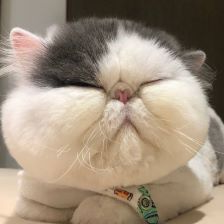

In [6]:
# 随机水平翻转,默认翻转概率为p=0.5
h_filp = tfs.RandomHorizontalFlip()(im)
h_filp

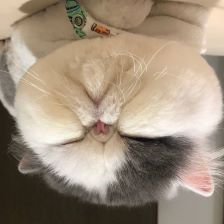

In [7]:
# 随机竖直翻转,默认翻转概率为p=0.5
v_flip = tfs.RandomVerticalFlip(p=0.5)(im)
v_flip

## 随机角度旋转
一些角度的旋转仍然是非常有用的数据增强方式，在`torchvision`中，使用`torchvision.transforms.RandomRotation()`来实现，其中第一个参数就是随机旋转的角度，比如填入10，那么每次图片就会在$-10 \sim 10$度之间随机旋转

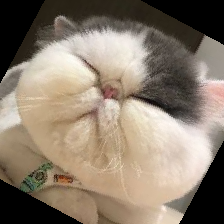

In [8]:
# 随机角度旋转
rot_im = tfs.RandomRotation(45)(im)
rot_im

## 亮度、对比度和颜色的变化
除了形状变化外，颜色变化又是另外一种增强方式，其中可以设置亮度变化，对比度变化和颜色变化等，在`torchvision`中主要使用`torchvision.transforms.ColorJitter()`来实现的，第一个参数就是亮度的比例，第二个是对比度，第三个是饱和度，第四个是颜色

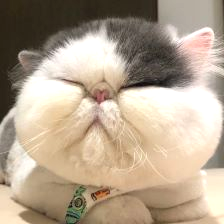

In [9]:
# 亮度
bright_im = tfs.ColorJitter(brightness=1)(im) # 随机从 0 ~ 2 之间亮度变化，1 表示原图
bright_im

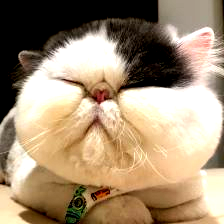

In [10]:
# 对比度
contrast_im = tfs.ColorJitter(contrast=1)(im) # 随机从 0 ~ 2 之间对比度变化，1 表示原图
contrast_im

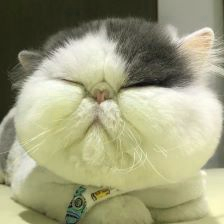

In [11]:
# 颜色
color_im = tfs.ColorJitter(hue=0.5)(im) # 随机从 -0.5 ~ 0.5 之间对颜色变化
color_im

## 图片增强方法的联合调用
比如先做随机翻转，然后随机截取，再做对比度增强等等，`torchvision`里面有个非常方便的函数能够将这些变化合起来，就是 `torchvision.transforms.Compose()`

In [12]:
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])

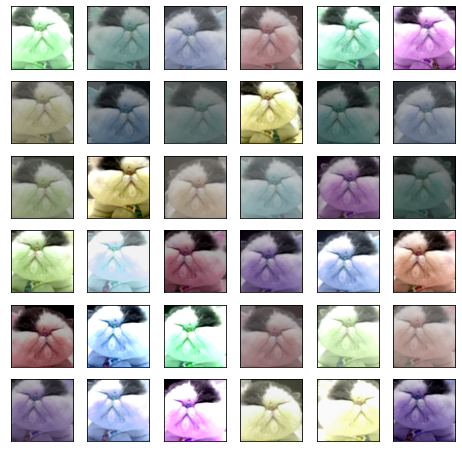

In [13]:
nrows = 6
ncols = 6
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [14]:
# 使用数据增强定义训练集上的transform
train_aug_tf = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

In [15]:
train_aug_set = CIFAR10('./data', train=True, transform=train_aug_tf, download=True)
train_aug_loader = torch.utils.data.DataLoader(train_aug_set, batch_size=32, shuffle=True)

Files already downloaded and verified


In [16]:
a = next(iter(train_aug_loader))
print(type(a))
print(a[0].shape)
print(a[1].shape)

<class 'list'>
torch.Size([32, 3, 96, 96])
torch.Size([32])
